# Contact Map

## Mapping function 

In [1]:
import numpy as np

def renumberHKinv(l_as):
    """
    #bs: numbers in the reference PDB sequence
    #l_as: numbers in my HMM-aligned HK alignments
    """
    bs=np.zeros(len(l_as));
    for i in range(len(l_as)):
        a=l_as[i]
        if a<=28:
            #1->19
            b=a+18
        elif (a==29):
            #special
            b=48
        elif (a==30):
            #this is deleted
            b=np.NaN
        elif (a>30 and a<=63):
            #32->55
            b=a+23
        elif a>63:
            #those are deleted
            b=np.NaN
        elif np.isnan(a):
            b=np.NaN      
        bs[i]=b
    bs=bs-13
    return bs
    #bs=bs+231; #offset in PDB - no need here!
    
def renumberRRinv(l_as):
    """
    #bs: numbers in the reference PDB sequence
    #l_as: numbers in my HMM-aligned RR alignments
    """
    bs=np.zeros(np.size(l_as));
    for i in range(np.size(l_as)):
        a=l_as[i]
        if a<=22:
            b=a+4
        elif (a==23):
            #this is deleted
            b=np.NaN
        elif (a>23 and a<=68):
            b=a+3
        elif (a>68 and a<=111):
            b=a+5
        elif np.isnan(a):
            b=np.NaN      
        bs[i]=b
    return bs

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import *

def index_contact(ind_residue,ind_max_residue):
    l_hk = renumberHKinv(np.arange(64))
    l_rr = renumberRRinv(np.arange(112))
    if ind_residue>ind_max_residue:
        ind_residue -= ind_max_residue
        try:
            ind_contact = np.where(l_rr==ind_residue)[0][0] + 64
            if len(np.where(l_rr==ind_residue)[0])>1:
                print("error")
        except Exception as e:
            ind_contact = None
            #print(e)
    else:
        try:
            ind_contact = np.where(l_hk==ind_residue)[0][0]
            if len(np.where(l_rr==ind_residue)[0])>1:
                print("error")
        except Exception as e:
            ind_contact = None
    return ind_contact

def contact(proteinhk,proteinrr,Threshold_Contact = 5, method_distance = "CarbonAlpha" ):
    """
    method_distance = "CarbonAlpha" or "MinAllDist"
    """
    parser = PDBParser()
    structure = parser.get_structure("molecule", '3DGE.pdb')
    model = structure[0]
    l_hk = renumberHKinv(np.arange(64))
    l_rr = renumberRRinv(np.arange(112))
    
    L_residue1 = list(model[proteinhk].get_residues())
    L_residue2 = list(model[proteinrr].get_residues())
    Carbonne_alpha = "CA"
    L_residue1[:] = [x for x in L_residue1 if x.has_id(Carbonne_alpha)== True]
    L_residue2[:] = [x for x in L_residue2 if x.has_id(Carbonne_alpha)== True]
    L_tot = L_residue1 + L_residue2
    L_Edge = []
    for ind_residue,residue in enumerate(L_tot[:-1]):
        for ind_residue2,residue2 in enumerate(L_tot[ind_residue+1:], start = ind_residue+1):
            if method_distance =="CarbonAlpha":
                distance = abs(residue[Carbonne_alpha] - residue2[Carbonne_alpha])
            else:
                distance = np.inf
                for mol in residue:
                    for mol2 in residue2:
                        d = abs(mol - mol2)
                        if d<distance:
                            distance=d                       
            if distance<Threshold_Contact:
                i_1 = index_contact(ind_residue,len(L_residue1))
                i_2 = index_contact(ind_residue2,len(L_residue1))
                if not (i_1 is None or i_2 is None):
                    L_Edge.append((i_1,i_2))
    return L_Edge

In [8]:
proteinhk="A"
proteinhk2="B"
proteinrr="C"
proteinrr2="D"
Threshold_Contact = 4
L_edge = [];L_edge_1 = [];L_edge_2 = [];L_edge_3 = []
print("1")
L_edge = contact(proteinhk,proteinrr,Threshold_Contact = Threshold_Contact, method_distance= "MinAllDist")
print("2")
L_edge_1 = contact(proteinhk2,proteinrr,Threshold_Contact = Threshold_Contact, method_distance= "MinAllDist" )
print("3")
L_edge_2 = contact(proteinhk,proteinrr2,Threshold_Contact = Threshold_Contact, method_distance= "MinAllDist")
print("4")
L_edge_3 = contact(proteinhk2,proteinrr2,Threshold_Contact = Threshold_Contact, method_distance= "MinAllDist" ) #Contact 145,13 not present in the data of AF

1


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:




2


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:




3


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:




4


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/home/andonis/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:




In [9]:
L_edge_tot = L_edge.copy()
for l in L_edge_1:
    if l not in L_edge_tot:
        L_edge_tot.append(l)
for l in L_edge_2:
    if l not in L_edge_tot:
        if not(l[0]>63 and l[1]>63):
            L_edge_tot.append(l)
for l in L_edge_3:
    if l not in L_edge_tot:
        #if not(l[0]<63 and l[1]<63):
        L_edge_tot.append(l)
c=0
for l in L_edge_tot:
    if abs(l[0]-l[1])>=4:
        #print(l)
        c+=1
print(c)

293


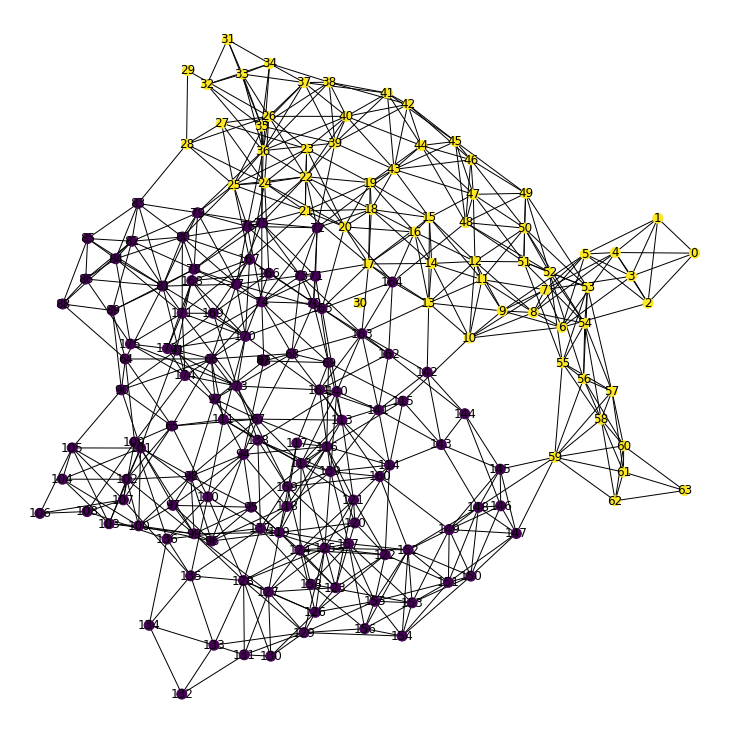

In [10]:
Graph = nx.Graph()
Graph.name = "Adjency_Matrix_prot_HK_and_RR_Threshold_" + str(Threshold_Contact)
Graph.add_nodes_from(range(64+112))
Graph.add_edges_from(L_edge_tot)

plt.figure(figsize=(10,10))
for node in range(len(Graph)):
    Graph.nodes[node]["subset"] = (node//64==0)
    
nx.draw_kamada_kawai(Graph,with_labels=True , node_size=100, node_color=[Graph.nodes[node]["subset"] for node in Graph.nodes()]) #pos=nx.drawing.multipartite_layout(Graph,align='horizontal')
plt.savefig("Graph.name.jpg")
M_adjency_Graph = nx.adjacency_matrix(Graph)
np.save("Adjency_Matrix_prot_HK_and_RR_Threshold_"+ str(Threshold_Contact), M_adjency_Graph)
nx.write_gexf(Graph,"Graph_HK_and_RR_Threshold_" + str(Threshold_Contact))

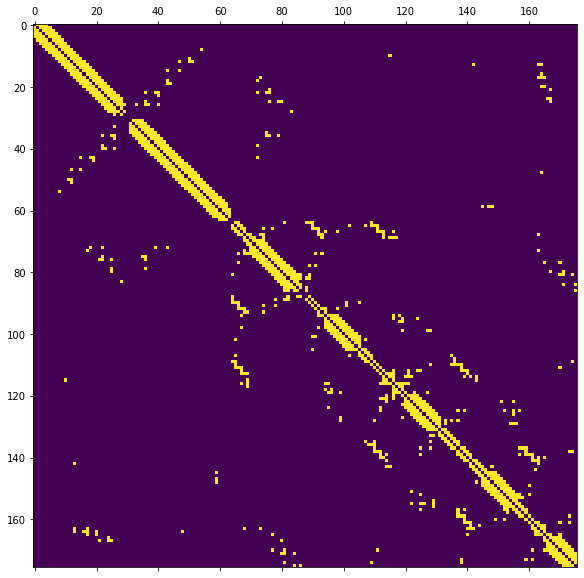

In [11]:
import os
import plotly.express as px
name=os.path.abspath('')
sparse = nx.adjacency_matrix(Graph)
plt.figure(figsize=(10,10))
plt.matshow(sparse.toarray(),fignum=0)
fig = px.imshow(sparse.toarray())
fig.show()
#plt.title("Threshold Contact = %s A"%Threshold_Contact )
#plt.savefig(name+"Threshold Contact %sA.jpg"%Threshold_Contact)

##Contact seem to be ok : Check on the position of 1 contacts
I could have less or more contacts than the AF code 